In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
def crossEntropy(hx,y):
    if y==1:
        return -np.log(hx)
    else:
        return -np.log(1-hx)
    
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def derivativeCrossEntropy(hx,y):
    if y==1:
        return -1/hx
    else:
        return 1/(1-hx)
    
def derivativeSigmoid(x):
    return x*(1-x)

In [4]:
# PART 1 - TRAINING

In [5]:
trainingX = np.array([[0,0],[0,5],[5,0],[5,5]])
trainingY = np.array([0,1,1,1])

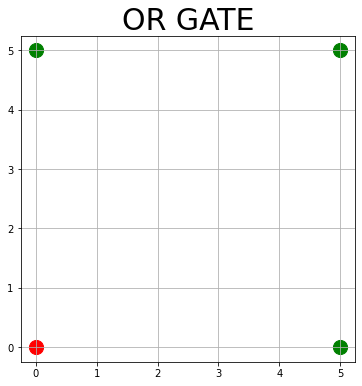

In [6]:
area = 200
fig = plt.figure(figsize=(6,6))
plt.title('OR GATE',fontsize = 30)
temp = fig.add_subplot(111)

temp.scatter(0,0, s = area , c='r', label = "Class 0")
temp.scatter(0,5, s = area , c='g', label = "Class 1")
temp.scatter(5,0, s = area , c='g', label = "Class 1")
temp.scatter(5,5, s = area , c='g', label = "Class 1")
plt.grid()
plt.show()

In [7]:
lower = -0.01
upper = 0.01

w2 = np.random.uniform(low = lower,high = upper, size = (1,))
w1 = np.random.uniform(low = lower,high = upper, size = (1,))
w0 = np.random.uniform(low = lower,high = upper, size = (1,))

In [8]:
noOfEpochs = 2000
alpha = 0.01

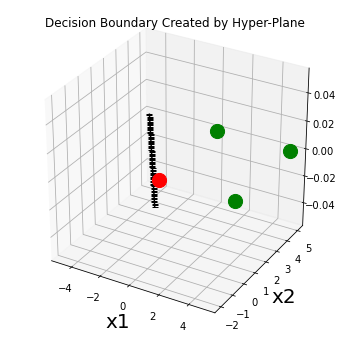

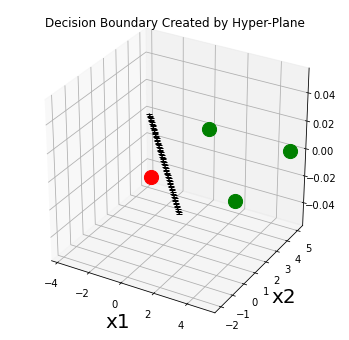

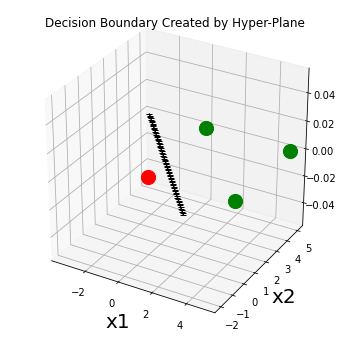

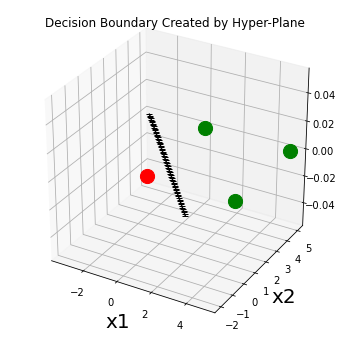

In [9]:
Eavg = []

for e in range(noOfEpochs):
    randomIdx = np.arange(trainingX.shape[0])
    np.random.shuffle(randomIdx)
    
    eavg = []
    for i in randomIdx:
        x = trainingX[i]
        z = w0 + w1*x[0] + w2*x[1]
        hx = sigmoid(z)
        
        eavg.append(crossEntropy(hx,trainingY[i]))
        dEdw0 = derivativeCrossEntropy(hx,trainingY[i])*derivativeSigmoid(hx)
        dEdw1 = derivativeCrossEntropy(hx,trainingY[i])*derivativeSigmoid(hx)*x[0]
        dEdw2 = derivativeCrossEntropy(hx,trainingY[i])*derivativeSigmoid(hx)*x[1]
        
        w0 = w0 - alpha*dEdw0
        w1 = w1 - alpha*dEdw1
        w2 = w2 - alpha*dEdw2
        
    if e % 500 == 0:
        fig = plt.figure(figsize = (6,6))
        plt.title('OR GATE', fontsize = 20)
        temp = fig.add_subplot(111, projection = '3d')
            
        temp.scatter(0,0, s = area , c='r', label = "Class 0")
        temp.scatter(0,5, s = area , c='g', label = "Class 1")
        temp.scatter(5,0, s = area , c='g', label = "Class 1")
        temp.scatter(5,5, s = area , c='g', label = "Class 1")
            
        plt.title('Decision Boundary Created by Hyper-Plane')
            
        x1 = np.arange(-2,5,0.1)
        w1*x[0] + w2*x[1] + w0
        x2 = (-w1/w2)*x1 - (w0/w2)
        plt.grid()
        plt.plot(x2,x1,'-k',marker = '_',label="DB")
        plt.xlabel('x1',fontsize = 20)
        plt.ylabel('x2',fontsize = 20)
            
        
    Eavg.append(np.mean(eavg))

In [10]:
print("\nFinal weights - ")
print("w0 = ",w0,"w1 = ",w1,"w2 = ",w2)


Final weights - 
w0 =  [-2.72637209] w1 =  [1.6455898] w2 =  [1.64559806]


In [11]:
# PART 2 - TESTING

In [12]:
testingX = [[4.9, 5],[0.05, 4.85],[3.85, 4.95],[4.56, 5.01],[4.4, 0.55],[4.1, 4.5],[4.0, 5],[0.10, 0.05],[1.05, 4.95],[0.55, 1],[3.95, 5],[0.55, 5.10],[4.90, 4.35],[1, 6.5],[1.0, 0.015]]
testingY = [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]

In [13]:
total = 15
correct = 0

In [14]:
for i in range(len(testingX)):
    temp = w0 + w1*testingX[i][0] + w2*testingX[i][1]
    
    if ( temp >= 0 ):
        ans = 1
    else:
        ans = 0

    print("\nx1 - ",testingX[i][0],",x2 - ",testingX[i][1])
    print("Predicted - ",ans,",Actual - ",testingY[i])

    if ( ans == testingY[i] ):
        correct = correct + 1

print ( "\nAccuracy - ", correct/total)


x1 -  4.9 ,x2 -  5
Predicted -  1 ,Actual -  1

x1 -  0.05 ,x2 -  4.85
Predicted -  1 ,Actual -  1

x1 -  3.85 ,x2 -  4.95
Predicted -  1 ,Actual -  1

x1 -  4.56 ,x2 -  5.01
Predicted -  1 ,Actual -  1

x1 -  4.4 ,x2 -  0.55
Predicted -  1 ,Actual -  1

x1 -  4.1 ,x2 -  4.5
Predicted -  1 ,Actual -  1

x1 -  4.0 ,x2 -  5
Predicted -  1 ,Actual -  1

x1 -  0.1 ,x2 -  0.05
Predicted -  0 ,Actual -  0

x1 -  1.05 ,x2 -  4.95
Predicted -  1 ,Actual -  1

x1 -  0.55 ,x2 -  1
Predicted -  0 ,Actual -  0

x1 -  3.95 ,x2 -  5
Predicted -  1 ,Actual -  1

x1 -  0.55 ,x2 -  5.1
Predicted -  1 ,Actual -  1

x1 -  4.9 ,x2 -  4.35
Predicted -  1 ,Actual -  1

x1 -  1 ,x2 -  6.5
Predicted -  1 ,Actual -  1

x1 -  1.0 ,x2 -  0.015
Predicted -  0 ,Actual -  0

Accuracy -  1.0
